In [1]:
import pandas as pd 

In [3]:
x="khale"
print(f"HI {x}")

HI khale


In [2]:
def get_comment_id(comment_id):
    return comment_id.split("_")[1]


In [3]:
data=pd.read_csv("comments_all_with_post_id.csv")
data['id_comment']=data['comment_id'].apply(get_comment_id)


In [4]:
import emoji
import functools
import operator
import re


# remove emoji from data
def split_emoji(txt):
#     em = txt
#     em_split_emoji = emoji.get_emoji_regexp().split(em)
#     em_split_whitespace = [substr.split() for substr in em_split_emoji]
#     em_split = functools.reduce(operator.concat, em_split_whitespace)
#     res = ''

#     for i in range(len(em_split)):
#         if em_split[i] not in emoji.UNICODE_EMOJI:
#             if i != len(em_split) - 1:
#                 res += em_split[i] + ' '
#             else:
#                 res += em_split[i]
#         else:
#             continue
    return txt


# do all operation pre_processing on data
def preprocessing(data, stop_word):
    data = split_emoji(data)
    data = str(' '.join(re.sub("([٠١٢٣٤٥٦٧٨٩]+)|([0-9]+)|([A-Za-z]+)|\_+|(\#)+|(\/)+|(\:)+", " ", data).split()))
    data = re.sub("[إأٱآا]", "ا", data)
    data = re.sub("ة", "ه", data)
    # remove duplicate
    noise = re.compile(""" ّ    | # Tashdid
                            َ    | # Fatha
                            ً    | # Tanwin Fath
                            ُ    | # Damma
                            ٌ    | # Tanwin Damm
                            ِ    | # Kasra
                            ٍ    | # Tanwin Kasr
                            ْ    | # Sukun
                            ـ   |  # Tatwil/Kashida
                            ،   |
                        """, re.VERBOSE)
    flagsUs = re.compile("["
                         u"\U0001F680-\U0001F6FF"  # transport & map symbols
                         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                         "]+", flags=re.UNICODE)
    dirtyChars = re.compile("["
                            "\u0600-\u0620"
                            "\u063B-\u0640"
                            "\u064B-\u065F"
                            "\u066A-\u06FF"
                            "\u0750-\u077F"
                            "\u08A0-\u08FF"
                            "\uFB50-\uFBE9"
                            "\uFBF0-\uFBFB"
                            "\uFC5B-\uFC63"
                            "\uFCF2-\uFCF4"
                            "\uFD3C-\uFD4F"
                            "\uFD90-\uFD91"
                            "\uFDC8-\uFDFF"
                            "\uFE70-\uFE7F"
                            "\uFEFD-\uFEFF"
                            "]+", flags=re.UNICODE)
    data = str(re.sub(flagsUs, '', data))
    data = str(re.sub(dirtyChars, '', data))
    data = str(re.sub(noise, '', data))
#     data = str(''.join(c for c in data if c not in punctuation))
    data = re.sub(
        '\/+|\●+|\◽+|\٪+|\▪+|\»+|\«+|\_+|\ʚïɞ+|\▐+|\►+|\"+|\*+|\▁+|\》+|\《+|\[+|\Ещё+|\]+|\|+|\;+|\'+|\<+|\>+|\\+|\`+|\{+|\}+|\~+|\"+|\-+|\:+|\@+|\#+|\$+|\ﷺ+|\%+|\^+|\&+|\(+|\)+|\.+|\,+|\?+|\=+|\++|\؛+\“+|\”+',
        ' ', data)
    data = re.sub('\!', '  ', data)
    data = re.sub('\⚘', '  ', data)
    data = re.sub('\��', '  ', data)
    data = re.sub('\؟ ', ' ', data)
    data = re.sub('\.', ' ', data)
    data = re.sub('\s+', ' ', data)
    data = re.sub('\\\+', ' ', data)
    data = re.sub('\"+',' ',data)
    data = re.sub(' ا ', ' ', data)
    data = re.sub(' ب ', ' ', data)
    data = re.sub(' ت ', ' ', data)
    data = re.sub(' ث ', ' ', data)
    data = re.sub(' ج ', ' ', data)
    data = re.sub(' ح ', ' ', data)
    data = re.sub(' خ ', ' ', data)
    data = re.sub(' د ', ' ', data)
    data = re.sub(' ذ ', ' ', data)
    data = re.sub(' ر ', ' ', data)
    data = re.sub(' ز ', ' ', data)
    data = re.sub(' س ', ' ', data)
    data = re.sub(' ش ', ' ', data)
    data = re.sub(' ص ', ' ', data)
    data = re.sub(' ض ', ' ', data)
    data = re.sub(' ط ', ' ', data)
    data = re.sub(' ظ ', ' ', data)
    data = re.sub(' ع ', ' ', data)
    data = re.sub(' غ ', ' ', data)
    data = re.sub(' ف ', ' ', data)
    data = re.sub(' ق ', ' ', data)
    data = re.sub(' ك ', ' ', data)
    data = re.sub(' ل ', ' ', data)
    data = re.sub(' م ', ' ', data)
    data = re.sub(' ن ', ' ', data)
    data = re.sub(' ه ', ' ', data)
    data = re.sub(' و ', ' ', data)
    data = re.sub(' ي ', ' ', data)
    data = re.sub(' ئ ', ' ', data)
    data = re.sub(' ؤ ', ' ', data)
    data = re.sub(' ء ', ' ', data)
    data = re.sub('\_+', ' ', data)
    data = re.sub('\…+', ' ', data)
    data = re.sub('\“|\”', '', data)
    data = re.sub(r'([\u0600-\u06FF])\1{3,}', r'\1\1\1', data)
    data = re.sub(r'[\u2066]', ' ', data)
    data = re.sub(r'[\u2069]', ' ', data)
    data = re.sub(r'[\uFE0F]', ' ', data)
    data = re.sub(r'[\u25a0]', ' ', data)
    data = re.sub(r'[\u2022]', ' ', data)
    data = re.sub(r'[\u2592]', ' ', data)
    data = re.sub('[\u1ea0]|[\u1ea1]|[\u1e97]|[\u1ea1]|[\u02bf]|[\u1e97]|[\u1ea1]|[\u1e97]|[\u1ea1]|[\u1ea1]|[\u02be]|[\u1ea1]|[\u1ea1]',' ',data)
    data = ' '.join([word for word in data.split() if word not in stop_word])
    data = " ".join(data.split())
    return data


In [5]:
data1=pd.read_csv("all_posts_with_reactions.csv")
data1

,id,number_comment,like,haha,sad,love,content
0,3704530089573060,57,684,21,5,26,بالشهر التالت من عام 2011 بلشت المظاهرات بسوري...
1,502473787264710,826,1239,1,0,55,لمن يتساءل عن تاريخ بدأ التقدم لمفاضلة التعليم...
2,1116925088478088,112,428,406,0,3,#للترفيه 😂
3,2332511573679339,2,39,0,0,0,سعر الصرف مستقر عند 603 ليرات للدولار من صندوق...
4,2471694386452348,32,148,12,0,4,🔴 #تورات 2019 🔚 ليبانيز ستايل 😉🍭
...,...,...,...,...,...,...,...
1130657,1579898915547654,1,50,0,0,9,من القرداحة الله سورية بشار وبسالان اجواء اللا...
1130658,6337686102923475,18,204,1,0,13,# يتشرف أهالي ضاحية الأسد بدعوتكم إلى خيمة وطن...
1130659,974640633363512,220,201,84,1,3,#آخر_صيحات_الموضة بنطال نسائي معروض بأحد المحل...
1130660,975452323282343,4,30,0,0,0,#جامعة_تشرين_اختبار_اللغة_للقيد_في_درجة_الماجس...


In [6]:
my_data=pd.merge(left=data,right=data1,left_on="post_id",right_on="id")
my_data['content_comment']=my_data['content_comment'].apply(preprocessing,args=([[]]))

In [7]:
my_data.dropna()

,post_id,comment_id,content_comment,id_comment,id,number_comment,like,haha,sad,love,content
0,4.269768e+14,426976778204636_427844874784493,تم,427844874784493,426976778204636,1,100,0,0,2,الحوار المفتوح مع وزير الاعلام عماد سارة وز...
1,2.611214e+15,2611214372247927_2611290742240290,,2611290742240290,2611214372247927,6,58,0,0,8,Elegance in every color from #ElieHallakJewelr...
2,2.611214e+15,2611214372247927_2611290498906981,حلوين كتير,2611290498906981,2611214372247927,6,58,0,0,8,Elegance in every color from #ElieHallakJewelr...
3,2.611214e+15,2611214372247927_2611228395579858,جميلات,2611228395579858,2611214372247927,6,58,0,0,8,Elegance in every color from #ElieHallakJewelr...
4,2.611214e+15,2611214372247927_2611342945568403,الاخضر,2611342945568403,2611214372247927,6,58,0,0,8,Elegance in every color from #ElieHallakJewelr...
...,...,...,...,...,...,...,...,...,...,...,...
515825,9.754523e+14,975452323282343_975456513281924,اخر دوره للقيد لجامعه البعث لو سمحتوا اذا موجوده,975456513281924,975452323282343,4,30,0,0,0,#جامعة_تشرين_اختبار_اللغة_للقيد_في_درجة_الماجس...
515826,9.754523e+14,975452323282343_975456826615226,,975456826615226,975452323282343,4,30,0,0,0,#جامعة_تشرين_اختبار_اللغة_للقيد_في_درجة_الماجس...
515827,9.754523e+14,975452323282343_975778229916419,,975778229916419,975452323282343,4,30,0,0,0,#جامعة_تشرين_اختبار_اللغة_للقيد_في_درجة_الماجس...
515828,9.754523e+14,975452323282343_975773033250272,محمود عثمان,975773033250272,975452323282343,4,30,0,0,0,#جامعة_تشرين_اختبار_اللغة_للقيد_في_درجة_الماجس...


In [8]:
my_data["id"].unique()

array([ 426976778204636, 2611214372247927,  528485761112570, ...,
       1579912675546278,  975452323282343,  974640633363512], dtype=int64)

# filter keyword

In [9]:
posts_with_comments_groups_count=my_data.groupby("post_id").count()
posts_with_comments_groups=my_data.groupby("post_id")

In [10]:
posts_sorted=posts_with_comments_groups_count.sort_values(by=['content_comment'],ascending =False)
posts_sorted

,comment_id,content_comment,id_comment,id,number_comment,like,haha,sad,love,content
post_id,,,,,,,,,,
5.054792e+14,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500
1.545782e+14,1347,1347,1347,1347,1347,1347,1347,1347,1347,1347
4.169573e+14,1170,1170,1170,1170,1170,1170,1170,1170,1170,1170
4.174252e+15,897,897,897,897,897,897,897,897,897,897
4.114257e+15,867,867,867,867,867,867,867,867,867,867
...,...,...,...,...,...,...,...,...,...,...
3.200286e+15,1,1,1,1,1,1,1,1,1,1
1.337216e+15,1,1,1,1,1,1,1,1,1,1
3.200082e+15,1,1,1,1,1,1,1,1,1,1


In [15]:
goal_post=posts_with_comments_groups.get_group(posts_sorted.index[500])

In [12]:
posts_sorted.index[100]

3557833427586969.0

In [16]:
useful_cols=['post_id',"id_comment","content","content_comment"]

In [17]:
data=goal_post[useful_cols]
data

,post_id,id_comment,content,content_comment
423901,6.923256e+14,749221049204265,مفاجئة نجاحها في شهادة الثانوية العامة بـ سوري...,جطعه اهل لو تكرمت 😂😂😂
423902,6.923256e+14,692327568049407,مفاجئة نجاحها في شهادة الثانوية العامة بـ سوري...,
423903,6.923256e+14,692385948043569,مفاجئة نجاحها في شهادة الثانوية العامة بـ سوري...,ام مهدي
423904,6.923256e+14,692385878043576,مفاجئة نجاحها في شهادة الثانوية العامة بـ سوري...,اي شو عليها 🙂💕🌸☻
423905,6.923256e+14,692362581379239,مفاجئة نجاحها في شهادة الثانوية العامة بـ سوري...,وينن اهلي 😐💔
...,...,...,...,...
423978,6.923256e+14,692362658045898,مفاجئة نجاحها في شهادة الثانوية العامة بـ سوري...,احمد ابراهيم 😂😂😂رح تصير سياده الملازم اول انت ...
423979,6.923256e+14,692335034715327,مفاجئة نجاحها في شهادة الثانوية العامة بـ سوري...,قبالي🙄
423980,6.923256e+14,299834104636246,مفاجئة نجاحها في شهادة الثانوية العامة بـ سوري...,كيفك شو اخبارك
423981,6.923256e+14,299740537978936,مفاجئة نجاحها في شهادة الثانوية العامة بـ سوري...,😮😮


In [18]:
data['len_comment']=data['content_comment'].apply(len)

c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


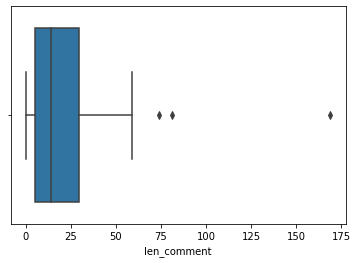

In [22]:
import seaborn as sns
sns.boxplot(x="len_comment",data=data)

In [62]:
data=goal_post[useful_cols]
print(len(data))
data['len_comment']=data['content_comment'].apply(len)

data['len_comment'].describe()

82


c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


count     82.000000
mean      20.475610
std       24.358549
min        0.000000
25%        5.250000
50%       14.000000
75%       29.750000
max      169.000000
Name: len_comment, dtype: float64

In [76]:
data=goal_post[useful_cols]

data=pd.DataFrame(data['content_comment'].values,columns=['comments'])
data['len_comment']=data['comments'].apply(len)
minimum=data['len_comment'].describe()['25%']
maximum=data['len_comment'].describe()['75%']
mean=data['len_comment'].describe()['std']
data=data[data['len_comment']>minimum]
data=data[data['len_comment']<maximum+mean]
data.comments.values

array(['جطعه اهل لو تكرمت 😂😂😂', 'ام مهدي', 'اي شو عليها 🙂💕🌸☻',
       'وينن اهلي 😐💔', 'الموبايل 💔🤣🤣🤣🤣🤣', 'á à Ö äñ', 'اي ماشي باي',
       'شو مشان', 'متل يلي جابولي ياها اهلي بضبط 🙂', 'مبروك 💛💜💌',
       'ريم عصفور', 'ياسر جميل جميل كيفك بابا',
       'دقيقه يا جماعه نفهم🙂😂 بالهنا❤',
       'شو لك حبيبي حرك حالك بدي سيراتو فورتي🤣🤣🤣',
       'متل اهلي هدوني فيلا بس ما بقعد فيا ما حلوه🌚😂😂😂💔',
       'نيالن ماعندن ازمه', '😲😲🥺🥺🥺🥺', 'بتستاهل مبروكه', 'شو هيدااا',
       'رويده ﻋﻠﻲ', 'لو في معنا كنا هديناهن هيك وزياده 🌹',
       'يعني ابوها مسؤول', 'نفس الهديه تماما',
       'فرح ابراهيم شخيص عقبالك ياروحي', 'و انت شو جبلك اب عاصم نجاحك',
       'احمد احمد كيخيا', '👏🏼👏🏼👏🏼', 'الله يرزقن ومبروك',
       'مبكرين بالخبر 🙄😒 مبروك 🙂', 'عفيف عفيف', 'اللي معو شو بيمنعو',
       'شو تركو للتخرج بقاا 😒😒اسكت يالساني😂😂😂😂', 'بتكون نجحانه واسطه',
       'وربي كلكون بتركبو حمير وبتقولي اهلي جابولي',
       'الكابتن لعلاج الوتاب وتشنجات الظهر والقدمين',
       'شو بيشتغل البابا بالله😁😁😁', 'تتزوجيني 🤣💔', 'ش

In [119]:

data=goal_post[useful_cols]
print(len(data))
data['len_comment']=data['content_comment'].apply(len)
minimum=data['len_comment'].describe()['25%']
maximum=data['len_comment'].describe()['75%']
mean=data['len_comment'].describe()['std']
data=data[data['len_comment']>minimum]
data=data[data['len_comment']<maximum+mean]
data.content_comment


82


c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


423901                                جطعه اهل لو تكرمت 😂😂😂
423903                                              ام مهدي
423904                                     اي شو عليها 🙂💕🌸☻
423905                                         وينن اهلي 😐💔
423907                                      الموبايل 💔🤣🤣🤣🤣🤣
423908                                             á à Ö äñ
423909                                          اي ماشي باي
423910                                              شو مشان
423911                      متل يلي جابولي ياها اهلي بضبط 🙂
423913                                            مبروك 💛💜💌
423914                                            ريم عصفور
423915                             ياسر جميل جميل كيفك بابا
423918                        دقيقه يا جماعه نفهم🙂😂 بالهنا❤
423920             شو لك حبيبي حرك حالك بدي سيراتو فورتي🤣🤣🤣
423921      متل اهلي هدوني فيلا بس ما بقعد فيا ما حلوه🌚😂😂😂💔
423924                                    نيالن ماعندن ازمه
423925                                  

In [122]:
def filter_len_comment(comments):
    data=pd.DataFrame(pd.Series(comments),columns=['comments'])
#     data=pd.DataFrame(data['content_comment'].values)
    data['len_comment']=data['comments'].apply(len)
    minimum=data['len_comment'].describe()['25%']
    maximum=data['len_comment'].describe()['75%']
    mean=data['len_comment'].describe()['std']
    data=data[data['len_comment']>=minimum]
    data=data[data['len_comment']<=maximum+mean]
#     print(data)
    relevent=data.comments.values
    not_relevent=list(set(comments)-set(relevent))
    return relevent,not_relevent
filter_len_comment(comments)

(array(['جطعه اهل لو تكرمت 😂😂😂', 'ام مهدي', 'اي شو عليها 🙂💕🌸☻',
        'وينن اهلي 😐💔', 'الموبايل 💔🤣🤣🤣🤣🤣', 'á à Ö äñ', 'اي ماشي باي',
        'شو مشان', 'متل يلي جابولي ياها اهلي بضبط 🙂', 'مبروك 💛💜💌',
        'ريم عصفور', 'ياسر جميل جميل كيفك بابا',
        'دقيقه يا جماعه نفهم🙂😂 بالهنا❤',
        'شو لك حبيبي حرك حالك بدي سيراتو فورتي🤣🤣🤣',
        'متل اهلي هدوني فيلا بس ما بقعد فيا ما حلوه🌚😂😂😂💔',
        'نيالن ماعندن ازمه', '😲😲🥺🥺🥺🥺', 'بتستاهل مبروكه', 'شو هيدااا',
        'رويده ﻋﻠﻲ', 'لو في معنا كنا هديناهن هيك وزياده 🌹',
        'يعني ابوها مسؤول', 'نفس الهديه تماما',
        'فرح ابراهيم شخيص عقبالك ياروحي', 'و انت شو جبلك اب عاصم نجاحك',
        'احمد احمد كيخيا', '👏🏼👏🏼👏🏼', 'الله يرزقن ومبروك',
        'مبكرين بالخبر 🙄😒 مبروك 🙂', 'عفيف عفيف', 'اللي معو شو بيمنعو',
        'شو تركو للتخرج بقاا 😒😒اسكت يالساني😂😂😂😂', 'بتكون نجحانه واسطه',
        'وربي كلكون بتركبو حمير وبتقولي اهلي جابولي',
        'الكابتن لعلاج الوتاب وتشنجات الظهر والقدمين',
        'شو بيشتغل البابا بالله😁😁😁', 

In [80]:
data=goal_post[useful_cols]

comments=data.content_comment.values

In [86]:
def filter_keyword(my_data,post_id):
    posts_with_comments_groups_count=my_data.groupby("post_id").count()
    posts_with_comments_groups=my_data.groupby("post_id")
    posts_sorted=posts_with_comments_groups_count.sort_values(by=['content_comment'],ascending =False)
    goal_post=posts_with_comments_groups.get_group(post_id)
    useful_cols=['post_id',"id_comment","content","content_comment"]
    data=goal_post[useful_cols]
    result_relevant=relevent(data['content'].values[0],data['content_comment'].values)
    result_relevant_by_keyword=result_relevant[0]
    result_not_relevant_by_keyword=result_relevant[1]
    percent_keyword=len(result_relevant_by_keyword)/len(data['content_comment'])
    return result_relevant_by_keyword,result_not_relevant_by_keyword,percent_keyword
# result_relevant,result_not_relevant_by_keyword,percent_keyword=filter_keyword(my_data,posts_sorted.index[100])

In [87]:
from Relevant import relevent

In [88]:
import pandas as pd




import nltk




def jaccard_similarity(query, document):
    try:
        
        intersection = set(query).intersection(set(document))
        union = set(query).union(set(document))
    except:
        intersection=0
        union=0
    try:
        
        if len(union)<=0:
            return 0
    except:
        return 0
    return len(intersection)/len(union)


def jaca(p,sentences,ss,max_iteration,iteration):
    s=0
    j=[]
    res=[]
    nres=[]
    for i in range(len(sentences)):
        ja=jaccard_similarity(list(nltk.bigrams(p)),list(nltk.bigrams(sentences[i])))
        if ja>0.1:
#             print(sentences[i],i,ja)
            j+=sentences[i]
            res.append(sentences[i])
    
        else:
            s+=1
            nres.append(sentences[i])
    if s==ss or iteration>max_iteration:
        return res,nres
    else :
        iteration+=1
        return  jaca(j,sentences,s,max_iteration,iteration)




def relevent(post,comments):
    rtemp=[]
    for i in range(len(comments)):
        ja=jaccard_similarity(post,comments[i])
        if ja>0:
            rtemp+=comments[i]
    return jaca(rtemp,comments,0,10,0)

In [89]:
# data['content'].values[0]

In [ ]:
# data['content'].values[10]

In [ ]:
# data['content_comment'].values

In [90]:
# result_relevant=relevent(data['content'].values[0],data['content_comment'].values)
# result_relevant_by_keyword=result_relevant[0]
# result_not_relevant_by_keyword=result_relevant[1]
# len(result_relevant_by_keyword)/len(data['content_comment'])

In [91]:
# result_relevant_by_keyword

In [92]:
# result_not_relevant_by_keyword

In [50]:
# frequent_comment_content=my_data.groupby("content_comment").count().sort_values(by=['post_id'],ascending =False)

In [93]:
# frequent_comment_content

In [52]:
# comment_frequents_once=frequent_comment_content[frequent_comment_content["comment_id"]<2].index

In [94]:
# result_unique=[]
# for comment in result_not_relevant_by_keyword:
# #     print(comment)
#     if comment in comment_frequents_once:
#         print(comment)
#         result_unique.append(comment)

In [95]:
def filter_unique(dataframe,result_not_relevant_by_keyword):
    frequent_comment_content=my_data.groupby("content_comment").count().sort_values(by=['post_id'],ascending =False) 
    comment_frequents_once=frequent_comment_content[frequent_comment_content["comment_id"]<2].index    
    result_unique=[]
    for comment in result_not_relevant_by_keyword:
    #     print(comment)
        if comment in comment_frequents_once:
#             print(comment)
            result_unique.append(comment)
    percent_unique=len(result_unique)/len(data['content_comment'])
    return result_unique,percent_unique
# result_unique,percent_unique=filter_unique(my_data,result_not_relevant_by_keyword)

In [96]:
# len(result_unique)/len(data['content_comment'])

# Top Frequent 

In [97]:
# accept_comment=pd.Series(result_not_relevant_by_keyword).value_counts()[pd.Series(result_not_relevant_by_keyword).value_counts()>0.1].index
# accept_comment

In [98]:
def filter_top_frequent(result_not_relevant_by_keyword):
    accept_comment=pd.Series(result_not_relevant_by_keyword).value_counts()[pd.Series(result_not_relevant_by_keyword).value_counts()>0.1].index
    result_Top_Frequent=[]
    for comment in result_not_relevant_by_keyword:
    #     print(comment)
        if comment in accept_comment:
    #         print(comment)
            result_Top_Frequent.append(comment)
    percent_top_frequent=len(result_Top_Frequent)/len(data['content_comment'])
    return result_Top_Frequent,percent_top_frequent
# result_Top_Frequent,percent_top_frequent=filter_top_frequent(result_not_relevant_by_keyword)

In [99]:
# result_Top_Frequent=[]
# for comment in result_not_relevant_by_keyword:
# #     print(comment)
#     if comment in accept_comment:
# #         print(comment)
#         result_Top_Frequent.append(comment)

In [101]:
# number_relevent=len(result_Top_Frequent)+len(result_relevant_by_keyword)+len(result_unique)
# number_relevent/len(data['content_comment'])

# Variance

In [102]:
# comments_Frequent_more_50=my_data.groupby(["content_comment","post_id"],as_index=False).count().sort_values(by=['like'],ascending =False)
# # comments_Frequent_more_50[comments_Frequent_more_50['id_comment']>10].dropna().groupby("content_comment").mean()['id']
# comments_Frequent_more_50

In [103]:
def filter_variance(dataframe,result_not_relevant_by_keyword):
    comments_Frequent_more_50=my_data.groupby(["content_comment","post_id"],as_index=False).count().sort_values(by=['like'],ascending =False)
    comments_Frequent_more_50=my_data.groupby(["content_comment","post_id"],as_index=False).count().sort_values(by=['id'],ascending =False)
    # comments_Frequent_more_50[comments_Frequent_more_50['id_comment']>10].dropna().groupby("content_comment").mean()['id']
    # comments_Frequent_more_50
    data_number_comments=my_data.groupby(["post_id"],as_index=False).count().sort_values(by=['id'],ascending =False)
    # 
    data_number_comments_=pd.merge(left=data_number_comments,right=comments_Frequent_more_50,right_on="post_id",left_on="post_id")[['post_id','content_comment_x','number_comment_y','content_comment_y']]
    data_number_comments_['wieght']=data_number_comments_['number_comment_y']/data_number_comments_['content_comment_x']
    data_number_comments_=data_number_comments_[data_number_comments_['content_comment_x']>20]
    data_number_comments_=data_number_comments_[data_number_comments_['number_comment_y']>1]
    # data_number_comments_[data_number_comments_['wieght']>=data_number_comments_['wieght'].describe()['25%']]
    comments_with_average_freq=data_number_comments_[['content_comment_y','wieght']].groupby("content_comment_y",as_index=False).median().sort_values(by=['wieght'],ascending =False)
    # comments_with_average_freq
    comments_that_frequenc=comments_with_average_freq['content_comment_y'].values
    result_variance=[]
    res_not=[]
    for comment in result_not_relevant_by_keyword:
    #     print(comment)
        if comment in comments_that_frequenc:
    #         print(comment)

            try:
                if (result_not_relevant_by_keyword.count(comment)/len(result_not_relevant_by_keyword))>comments_with_average_freq[comments_with_average_freq['content_comment_y']==comment]['wieght'].values[0]:
                    result_variance.append(comment)
                else:
                    if comment=="تم":
                        print("::::",result_not_relevant_by_keyword.count(comment)/len(result_not_relevant_by_keyword),comment,comments_with_average_freq[comments_with_average_freq['content_comment_y']==comment]['wieght'].values[0])
                    res_not.append(comment) 
            except:
                pass
    try:
        
        percent_variance=len(result_variance)/len(result_not_relevant_by_keyword)
    except:
        percent_variance=0
    result_variance=list(set(result_not_relevant_by_keyword)-set(res_not))
    return result_variance,percent_variance
# filter_variance(my_data,result_not_relevant_by_keyword)

In [104]:
# comments_Frequent_more_50=my_data.groupby(["content_comment","post_id"],as_index=False).count().sort_values(by=['id'],ascending =False)
# # comments_Frequent_more_50[comments_Frequent_more_50['id_comment']>10].dropna().groupby("content_comment").mean()['id']
# # comments_Frequent_more_50
# data_number_comments=my_data.groupby(["post_id"],as_index=False).count().sort_values(by=['id'],ascending =False)
# # 
# data_number_comments_=pd.merge(left=data_number_comments,right=comments_Frequent_more_50,right_on="post_id",left_on="post_id")[['post_id','content_comment_x','number_comment_y','content_comment_y']]
# data_number_comments_['wieght']=data_number_comments_['number_comment_y']/data_number_comments_['content_comment_x']
# data_number_comments_=data_number_comments_[data_number_comments_['content_comment_x']>20]
# data_number_comments_=data_number_comments_[data_number_comments_['number_comment_y']>1]
# # data_number_comments_[data_number_comments_['wieght']>=data_number_comments_['wieght'].describe()['25%']]
# comments_with_average_freq=data_number_comments_[['content_comment_y','wieght']].groupby("content_comment_y",as_index=False).median().sort_values(by=['wieght'],ascending =False)
# # comments_with_average_freq
# comments_that_frequenc=comments_with_average_freq['content_comment_y'].values
# comments_with_average_freq
# # comments_variance=data_number_comments_['content_comment_y']
# # comments_variance
# # data_number_comments_

In [105]:
# result_variance=[]
# for comment in result_not_relevant_by_keyword:
# #     print(comment)
#     if comment in comments_that_frequenc:
# #         print(comment)

#         try:
#             if (result_not_relevant_by_keyword.count(comment)/len(result_not_relevant_by_keyword))>comments_with_average_freq[comments_with_average_freq['content_comment_y']==comment]['wieght'].values[0]:
#                 result_variance.append(comment)
#         except:
#             pass
# result_variance

# Filter language

In [106]:
# from langdetect import detect

# lang = detect("english")

In [107]:
# data

In [108]:
import langid
#     posts_with_comments_groups_count=my_data.groupby("post_id").count()
#     posts_with_comments_groups=my_data.groupby("post_id")
#     posts_sorted=posts_with_comments_groups_count.sort_values(by=['content_comment'],ascending =False)
#     goal_post=posts_with_comments_groups.get_group(post_id)
import re
pattern_englis=re.compile(r"[A-Za-z]")
langid.classify("الله يعظم أجركم ويعطيكون الف عافية")
def filter_language(my_data,post_id):
    relevant=[]
    notrelevant=[]
    posts_with_comments_groups=my_data.groupby("post_id")
    goal_post=posts_with_comments_groups.get_group(post_id)
    useful_cols=['post_id',"id_comment","content","content_comment"]
    data=goal_post[useful_cols]
    try:
        
        post=data['content'].values[0]
    except:
        pass
    comments=data['content_comment'].values
    post=re.sub(pattern_englis,"",post)
    langpost=re.findall(pattern_englis,post)
    for comment in comments:
        
        langcomment=re.findall(pattern_englis,comment)
       
        if langcomment == langpost:
            
            relevant.append(comment)
        else:
#             print(langpost,post)
            notrelevant.append(comment)
    percent_language=len(relevant)/len(comments)
    return relevant,notrelevant
# relevant,notrelevant=filter_language(my_data,posts_sorted.index[0])
# relevant

In [123]:
import pandas as pd
import time
def filter_post(DataFrame,post_id):
    st=time.time()
    result_relevant,result_not_relevant_by_keyword,percent_keyword=filter_keyword(DataFrame,post_id)
    all_comments=result_relevant+result_not_relevant_by_keyword
    print("key_word:",time.time()-st)
    st=time.time()

    relevant,notrelevant=filter_language(DataFrame,post_id)    
    result_not_relevant_by_keyword=list(set(result_not_relevant_by_keyword)-set(notrelevant))
    result_relevant=list(set(result_relevant)-set(notrelevant))
    print("filter_language:",time.time()-st)
    st=time.time()
#     result_unique,percent_unique=filter_unique(DataFrame,result_not_relevant_by_keyword)
    
    result_Top_Frequent,percent_top_frequent=filter_top_frequent(result_not_relevant_by_keyword)    
    print("filter_top_frequent:",time.time()-st)
    st=time.time()
    result_variance,percent_variance=filter_variance(DataFrame,result_not_relevant_by_keyword)    
    print("filter_variance:",time.time()-st)
    st=time.time()
    Final_relevent=list(set(result_relevant+result_Top_Frequent+result_variance))

    Final_relevent,_=filter_len_comment(Final_relevent)
    print("filter_len_comment:",time.time()-st)
    st=time.time()
    Final_not_relevant=list(set(all_comments)-set(Final_relevent))
    return Final_relevent,Final_not_relevant
def filter_posts(dataframe,ids_posts):
    
    result={}
    for post_id in ids_posts:
        r=filter_post(dataframe,post_id)
        relevant=r[0]
        not_relevant=r[1]
        result[post_id]={"content_post":dataframe[dataframe['post_id']==post_id]['content'].values[0],"comments_relevent":relevant,"comment_not_relevent":not_relevant}
    
    return result
filter_posts(my_data,posts_sorted.index[10:20])

key_word: 11.859402179718018
filter_language: 0.20600509643554688
filter_top_frequent: 0.003000020980834961
filter_variance: 4.074995994567871
filter_len_comment: 0.009000301361083984
key_word: 5.462996482849121
filter_language: 0.20600295066833496
filter_top_frequent: 0.0019996166229248047
:::: 0.012987012987012988 تم 0.09090909090909091
filter_variance: 4.010074138641357
filter_len_comment: 0.007996320724487305
key_word: 6.997995615005493
filter_language: 0.20800065994262695
filter_top_frequent: 0.0020029544830322266
filter_variance: 4.066002368927002
filter_len_comment: 0.007998466491699219
key_word: 5.569995403289795
filter_language: 0.21799755096435547
filter_top_frequent: 0.003003358840942383
filter_variance: 4.017996072769165
filter_len_comment: 0.009002208709716797
key_word: 6.477992534637451
filter_language: 0.2089998722076416
filter_top_frequent: 0.0030062198638916016
filter_variance: 4.064995527267456
filter_len_comment: 0.009006261825561523
key_word: 10.997989892959595
filt

{4111493052221001.0: {'content_post': 'صباح الورد والرواق والجمال لمن يرد الصباح ❤🌷🌷',
  'comments_relevent': array(['ماريا اسماعيل', 'صباحك ورد وفل وياسمين',
         'صباح الورد والفل والياسمين 💐', 'يسعد صباحكن بلخير يارب',
         'صباحك ورد ماشاء الله هالوردات', 'صباح النرجس 💛', 'صباح النرجس 💐',
         'صباح الامل والبركه', 'صباح الخير والسعاده', 'صباح الخير 💚',
         'صباح ورد النرجس الجميل 😍', 'صباح الورود',
         'صباح الورد والياسمين والنرجس', 'صباح النوررر🌹🌹',
         'احلى صباح صباح النرجس🌸🌸', 'محمد الحماده', 'صباح الخير 💜💜',
         'ø ā ë ā ø ë شو رايككك', 'صباح الفل 🌹🌸🌼💐', 'صباح النور',
         'يسعد صباحكن صباح الخير', 'صباح ااالنرجسس', 'صباح العسل',
         'بدي منن 💔😂', 'اسعدالله صباحكم', 'صباح الخييير 💙',
         'صباح الورد والنرجس', 'يسعدصباحكم ومساكم', 'صباح الورد ولفل',
         'صباح النرجس والورد والوانو', 'سكارم صباح صباح', 'ام وسام 😘😘',
         'صباح النور ❤ ❤ ❤', 'يسعد صباحكن بكل خير', 'صباح الرواء',
         'صبااحكن 🌹❤', 'صباحكم ورد وياسمين', 

In [47]:
comments=['',
   'سلامتك يااسدنا انشالله لعدونك',
   'سلامه قلبك يارب',
   'حماك الله يا اسد ورعاك الواحد الاحد ❤❤',
   'الله يحميك ويحفظك من كل مكروه ويديم لشعبك محبتك',
   'ربي يحميلي ياااك يا كبير',
   'الله يحميك تاج العرب',
   'ربي يحميك ويطول بعمرك',
   'شايل هم الوطن شايل هم الشعب الله لايضرنا فيك ويحميلنا ياك سيدي الرئيس ارواحنا ودمائنا فداء لك ❤❤❤❤',
   'الله يحميك بدونك مافينا نبض دقيقه قهرتنا كتيررر',
   'سلامتك والله يحميك سياده الرئيس',
   'الله يحميك يابطل وتضل باحسن حال',
   'انشالله عدوينك يارب الله يحميلنا ياك',
   'الله يحميك سياده الرليس',
   'الله يبعد عنك كل مرض وسوء سياده الرئس',
   'سيد الوطن الله يحميك ويديم صحتك',
   'ربي يحميك يا اسدنا',
   'الروح فدك وبترخص قدامك سيدي الرئيس',
   'الله يحميك سيدي الرئيس الاسد ويطول بعمرك ❤❤❤❤',
   'حماك الله العزيز القدير وادامك ذخرا للبلاد',
   'ربنا يحفظك دعواتنا من مصر',
   'عمران عموري',
   'الله يحميك ويعطيك الصحه ويسوع يكون معك',
   'سلامه قلبك الله يبعد عنك كل شر',
   'انت روح هالبلد انت سيد البلد وحاميا وحامينا يا غالي يااسد يا كبير الله يحميك ياعزنا',
   'الله يحميه ويحفظو',
   'الله يحميك سياده الرئيس ويحمي هل بلد',
   'سلامه قلبك الله يحميك',
   'بحمى المولى حبيب القلب',
   'الله يحميك ويديمك تاج الراس يا اسد',
   'ماعلى قلبك شر انشالله اعداءك',
   'فداك روحي ياسيد الوطن',
   'الله يكون معك',
   'سلامه قلبك الله يخليلنا ياك',
   'الله يحميك ويبعد عنك كل مكروه',
   'الله يحميك سياده الرئيس الغالي يحمل معك',
   'بحمى الرحمن سيدي الرئيس',
   'الف سلامه لقلبك الله يحميك',
   'ريم عزيز',
   'الله يحميك ويخليك بصحه وعافيه يارب',
   'الله يقويك ويكون معك سيد الرئيس',
   'الله يحميك سياده الرئيس ويطول بعمرك 🌺🌺',
   'انت الامن والامان الله يحفظك ياتاج الراس',
   'الف حمدالله على السلامه وحماك الله وحفظك ونصرك على اعدائك سيدي الرئيس',
   'الله يحميك ويبعد عنك الشر وانشالله لاعداء الوجع والمرض',
   'حماك الله ياسيد الوطن',
   'الله يحميك❤❤❤',
   'حماك الله يامؤمن معك للابد',
   'ربي يعطيك الصحه العافيه ويحميك',
   'عنوان العزه والكرامه والشرف',
   'شهد الاسد',
   'الله يحفظك ويخليلنا ياك',
   'ربي معك ويحرسك من كل شر',
   'بحمى الرحمن',
   'سلامه قلبك الله يحميك ويديم عزك ياغالي',
   'الله يشفيك ويعافيك ويحميك',
   'ريتو الهبوط لالي ولقلبي لله يحميك ياكبير',
   'قمه التوضع سلامه قلبك يا قلب شعب كلو انتا ام نور تحميلنا ياك من كل شر وينصرك على عدوينك اسدنا للابد',
   'الله يديمك عز ونصر اعداء الوطن',
   'سلامه قلبك ياعمري',
   'نزل ضغطك طلع ضغطك بتظل اسد واعدائك كلاب',
   'الل̣̥ يحميك بجاه سيدنا علي',
   'حفظه الله من كل شر',
   'سلامتك الله يحميك ياغالي',
   'سلامه قلبك ياتاج راسنا الله يحميك يارب',
   'الهي يحميك ويشفيك وينصرك كل من بيعاديك ياسياده الرئيس',
   'سلامت قلبك وروحك',
   'الله يحميك بجاه الامام علي ويخلينا اياك ويطول بعمرك يارب',
   'صراحتك وجراتك سيدي الرئيس مثال نقتدي به سلامتك قلبك',
   'الله يحميك سلامتك انشالله',
   'الله طول بعمرك يا رب العالمين',
   'الله يعطيه القوه ويحميه ♥♥♥',
   'الله يحميك ويعافيك وينصرك ويطول بعمرك سياده الرئيس',
   'هبط قلبنا عالارض فداك الرووح',
   'محاسن جفول',
   'تم',
   'الله يحميك ويديم عزك يا اسد',
   'سلامتك الله يحميك ويعزك ياالله',
   'حماك الله سيدي الرئيس',
   'سلااامتك يانبض روحنا',
   'الله يحميك ويحفظك ياغالي',
   'سلامه قلبك يااسدنا',
   'حماك الله ورعاك سيدي الرئيس',
   'سلامتك ياغالي ياقلب سوريا',
   'الله يحميك ويديم عليك الصحه ويطول بعمرك❤❤❤',
   'حماك الله يا اسد رعاك الواحد الاحد',
   'ربي يحميك وياخد من عمرنا ويمدك',
   'الله يحميك يااسدنا',
   'الله يحميك سيدي الرئيس ويديم عليك الصحه والعافيه',
   'بحمى الرحمن قائدنا القوي الحكيم',
   'الله يحميك ويحرسك',
   'ربي يحميلنا اياك نزل قلبنا الارض ربي يمد عليك الصحه حرام يصيبك اي مكروه تاج الراس ورح اضلك تاج الراس كل العمر ❤',
   'سلامتك ياحامي الحمى',
   'نحنا منكبر فيك يا اسدنا الغالي ربنا يحميك 😍😍😍',
   'الله يحميك',
   'حماك الله رئيسنا الغالي',
   'العمر المديد وامدك الله بالقوه والعافيه ياسياده الرئيس بشارالاسد',
   'ربي يحميك ويشفيك سيدي',
   'سلاامه قبلك الله يحميك❤',
   'سلامه قلبك الله يحميك يااسدنا',
   'انشالله المرض لاعدائك يارب',
   'الله يحمي ويطول بعمرو',
   'الله يحميك ويبعد عنك كل مكروه اسدنا الغالي روحي فداك',
   'الله يحميك ومايضرنا فيك قائدناالغالي',
   'الله يحميه دخيل يلي خلقو الله يخليلنا ياك سلامه قلبك يااسد😍😍😍',
   'حماك لواحد لاحدو',
   'حماك الله',
   'الله يخليلنا ياك رئيسنا الغالي ويحميك',
   'سلامتك سياده الرئيس الله يحميك وياخد بيدك',
   'الله يحميه ويطول بعمره',
   'الله يحميك سيادهالرئيس يطول بعمرك',
   'الله يعطي الصحه وطولت العمر',
   'ياقلبي انت',
   'الله يحميك يارب ويطول بعمرك يارب',
   'حماك الواحد اللاحد',
   'القائد حماااك الله',
   'الله يحميك ويرد عنك كل شر',
   'سلامه قلبك الله يحميك من كل شر',
   'الله يحميك ويحفظك من كل مكروه',
   'الله يحميك يا اسدنا',
   'حماك الله السميع العليم سيدي الرئيس',
   'حماك الله ورعاك من كل شر يارب',
   'بحمى الرحمن ويديمك سند النا',
   'الله يبعد عنك كل شرويدمك كل العمر تاج وزخر لكل سوريا الام الله يحميك ويحفظك من عيون الحاقدين',
   'الف سلامه علقبك الله يحميك',
   'حماك الله سيدي الرئيس انت تاج الراس',
   'سلامتك والعدرا تحميك والله يطول بعمرك',
   'الله يحميه رئيسنا الغالي',
   'يالله تحميه وتخليه والله سوريا مالها طعم غير بوجودك ♥',
   'الله يحميك ياسيد الوطن ياعزنا يافخرنا',
   'الله يحميك ويكون معك بكل خطوه والله يطول بعمرك سيدنا وقائدنا',
   'بحمى الرحمن يا فخر الامه',
   'بحمى الرحمان الله يديمك ويخليك سيدي الرئيس',
   'الله لا يضعفك ويمدك بالقوه ويديم عزك',
   'الحمدلله مرقت خير الله يحميك ياكبير 💖',
   'ربي من عالي سماه يحميك وينصرك',
   'الروح فداك ياغالي',
   'سلامت قلبك وروحك الله يحميك ويمد بعمرك',
   'سلامتك من كل مكروه انشالله',
   'الله يحميك وسلامه قلبك',
   'سلامه قلبك يا كبير الله يطول بعمرك',
   'سلامتك ابو حافظ بحمى الرحمن',
   'الله يحميك ولايضرك يا اسدنا الغالي',
   'الله يحميك ويعافيك',
   'الله يحميك وياخد بايدك ❤❤❤',
   'سلامه قلبك وروحك سيدي الغالي سلامه عمرك يا عزنا وكرامتنا بحمى الرحمن سيدي المفدى',
   'الله يحميك ويكون عون معك يا اسدنا الغالي',
   'سلامت قلبك الله يحميك',
   'سلامه قلبك حماك الله',
   'الله يحميك ويديم عليك الصحه والعافيه',
   'ماعاقلبك شر سيدي لرئيس',
   'الله يحفظك ويحميك يارب💗💗💗',
   'حسين احمد',
   'المؤمنين لا خوف عليهم ولا هم يحزنون وانت يا سبدي رجل مؤمن حقا والعاقبه للمتقين شفاك الله وكفاك الله وعفاك الله ايها القائد سر بنا ايها الربان الى بر الامان',
   'اشرف وانبل البشر الله يطول بعمرك ❤',
   'الله يحميييك سياده الرئيس ويطول بعمرك يااارب',
   'سيدي الرئيس الله يحميك ويسدد خطاك',
   'الله يحميكم سيدي الرئيس',
   'بحمى الرحمن سياده الرئيس',
   'الله يحميك ويشفيك يارب',
   'سلامه قلبك ياسيدي الرئيس المقدس بشار حافظ الاسد',
   'والله سيدي لرئيس مافي غيرك تعبان منشانا وحامل همنا مو متل هل قدامك عجول مسمنه بيبلعو مابيشبعو ولك الله لايفقن بس يحسوبتعبك قليلين لاحساس',
   'ربي يحميك ويطول بعمرك سياده الرئيس وضل منور ونحنا بنور منضل',
   'وائل ابو صقر',
   'سلامه قلبك ❤',
   'سلامتك قلبك الله يحميك ويحفظك',
   'ميدو ميمي',
   'بحمى المولى سبحانه تعالى سياده الرئيس الغالي',
   'مخلصه جاكي',
   'الله يعطيك الصحه والعافيه وطول العمر ياسيد العرب',
   'حبيب الروح سلامتك قلوبنا فداك',
   'الله يحميك يارب الف سلامه عليك',
   'لم ياتي هذا التواضع من الفراغ بل انه سر الله الخفي الذي وضعه فيك سلامه قلبك من كل شر سياده الرئيس',
   'الله يحميك ويحفظك سيدي الرئيس ويطول بعمرك ياحق',
   'حماك الله العلي العظيم القدير على كل شيء',
   'الله يعافيك ويحميك يارب يا عزنا ❤❤❤',
   'حماك الله وحفظك رئيسنا المفدى',
   'الله يفظك ويحميك لسوريه ولشرفاء العرب',
   'سلامه قلبك يا اسدنا الغالي الله يطول بعمرك وينصرك💜💜🙏',
   'العدرء تحميك ورسول يقويك والله يخليك سوريا بشار حافظ علي سليمان الاسد',
   'الله يحميك يا اسدنا الغالي بحمي الرحمن',
   'سلامه قلبك وروحك الله يطول بعمرك ويحميك سياده الرئيس',
   'سلامه قلبك والله يحميك ويطول بعمرك',
   'الله يحميك ويحفظك من كل سوء ياغالي',
   'بحمى الرحمن حماك الله',
   'الله يحمي اسدنا',
   'الله يحميه ويحفظه',
   'حماك الله اسدنا',
   'الله يحميك اسدنا الغالي',
   'سلامتك الله يحميك ويديم عزك',
   'الله يحميكك قائدنا ويسعدك ربي',
   'سلامتك وحماك الله',
   'حماك الله ياغالي',
   'سلامتك يا اسدنا',
   'الله يعافي قلبك تاج راسنا ويطول بعمرك',
   'بحمى الرحمن ❤❤❤',
   'الله يحميك يانور عيونا',
   'انت عنوان للانسانيه يا اسدناالغالي ستبقى كبيرنا الى الابد حماك الله العلي القدير',
   'الله يحميك ويطول بعمرك ويديم عزك',
   'الله يحميك ويطول بعمرك',
   'سلامه قلبك رئيسنا الغالي 💓 💓 كنا مشتاقين لاطلالتك علينا حماك الله راعي الوطن💓💓💓💓❤ ❤ ❤ ❤ ❤ ❤ ❤ ❤',
   'الله يحميك ويكون معك ويسدد خطاك',
   'سلامه قلبك يا سيدنا😘',
   'سلامتك يا سيدي الرئيس الله يحميك',
   'حماك الواحد الاحد',
   'الله يحميه ويعطيه الصحه',
   'الف الحمدلله عالسلامه الله يحميك',
   'سلامتك ابو حافظ',
   'الله من عالي سماه يحميك ويبعد عنك كل مرض',
   'بحمى الباري',
   'الف الحمدلله عسلامتك الله يحميك ويعطيك القوه النصر على اعدا ئك ونحنا دائما فداك',
   'الله يحميك من كل شريارب',
   'الله يطول عمرك ويشفيك من كل مرض',
   'انشالله سلامتك وتضلك منور',
   'عيني روحك سلامه قلبك ياعيوني',
   'الله يحميك يكون معك دوم',
   'همسه همسه',
   'سلامتك الله يحميك',
   'الله يحميك اسدنا',
   'حماك الله يا اسدنا سلامه قلبك يارمز الوطن وقائدنا للابد باذن الله',
   'الله يحميك ويبعد عنك كل شر وينصرك ويقويك يارب',
   'سلااامه قلبك وروحك وضغطك',
   'حماك العلي القديير ممن كل شر',
   'الله يحميك من عالي سماه',
   'الله يحميك ويطول بعمرك ❤❤❤',
   'ياقلبي الله يحميك ويمد بعمرك ويشيل من عمري عمر ويعطيك']

In [70]:
res=[
        {
            "msg": "هلا وغلا ",
            "percent": 1.0000100135803223,
            "type": "__label__greeting,"
        },
        {
            "msg": "اي اقتصاد وانت؟ ",
            "percent": 0.9724247455596924,
            "type": "__label__study,"
        },
        {
            "msg": "ياهلا",
            "percent": 1.0000100135803223,
            "type": "__label__greeting,"
        },
        {
            "msg": "اقتصاد وانت شو دراستك؟",
            "percent": 0.9724247455596924,
            "type": "__label__study,"
        },
        {
            "msg": "اهلا وسهلا",
            "percent": 0.3140605390071869,
            "type": "__label__greeting,"
        },
        {
            "msg": "اي اقتصاد وانت؟ ",
            "percent": 0.9241518378257751,
            "type": "__label__study,"
        },
        {
            "msg": "اي اقتصاد وانت؟ ",
            "percent": 0.3415925204753876,
            "type": "__label__study,"
        }
    ]

In [75]:
pd.DataFrame(res).drop_duplicates("type").T.to_dict()[1]

{'msg': 'اي اقتصاد وانت؟ ',
 'percent': 0.9724247455596924,
 'type': '__label__study,'}

In [77]:
150/4*3/2

56.25

In [66]:
from nltk import ngrams

sentence = 'this is a foo bar sentences and i want to ngramize it'

n = 6
sixgrams = ngrams(sentence.split(), n)

for grams in sixgrams:
    print(grams)

('this', 'is', 'a', 'foo', 'bar', 'sentences')
('is', 'a', 'foo', 'bar', 'sentences', 'and')
('a', 'foo', 'bar', 'sentences', 'and', 'i')
('foo', 'bar', 'sentences', 'and', 'i', 'want')
('bar', 'sentences', 'and', 'i', 'want', 'to')
('sentences', 'and', 'i', 'want', 'to', 'ngramize')
('and', 'i', 'want', 'to', 'ngramize', 'it')


In [60]:
filter_variance(my_data,comments)  

:::: 0.004424778761061947 تم 0.09090909090909091


(['سلامتك يااسدنا انشالله لعدونك',
  'سلامه قلبك يارب',
  'الله يحميك من عالي سماه',
  'حماك الله يا اسد ورعاك الواحد الاحد ❤❤',
  'الله يحميك ويحفظك من كل مكروه ويديم لشعبك محبتك',
  'ربي يحميلي ياااك يا كبير',
  'الله يحميك تاج العرب',
  'ربي يحميك ويطول بعمرك',
  'شايل هم الوطن شايل هم الشعب الله لايضرنا فيك ويحميلنا ياك سيدي الرئيس ارواحنا ودمائنا فداء لك ❤❤❤❤',
  'الله يحميك بدونك مافينا نبض دقيقه قهرتنا كتيررر',
  'سلامتك والله يحميك سياده الرئيس',
  'الله يحميك يابطل وتضل باحسن حال',
  'انشالله عدوينك يارب الله يحميلنا ياك',
  'الله يحميك سياده الرليس',
  'الله يبعد عنك كل مرض وسوء سياده الرئس',
  'سيد الوطن الله يحميك ويديم صحتك',
  'ربي يحميك يا اسدنا',
  'الروح فدك وبترخص قدامك سيدي الرئيس',
  'الله يحميك سيدي الرئيس الاسد ويطول بعمرك ❤❤❤❤',
  'حماك الله العزيز القدير وادامك ذخرا للبلاد',
  'ربنا يحفظك دعواتنا من مصر',
  'عمران عموري',
  'الله يحميك ويعطيك الصحه ويسوع يكون معك',
  'سلامه قلبك الله يبعد عنك كل شر',
  'انت روح هالبلد انت سيد البلد وحاميا وحامينا يا غالي يااسد ي

In [45]:
posts_sorted.index[80:90]

Float64Index([2111356975675339.0, 3180088682102136.0, 3035540329907745.0,
              2769546560039076.0, 3980414025328905.0, 3182661435178194.0,
              4072208562816117.0, 3214801995405550.0, 1947772608707321.0,
              3974408059262835.0],
             dtype='float64', name='post_id')

In [166]:
my_data[my_data['post_id']==154578202864965.0]['content'].values[0]

'درس #صفة_الصفوة للشيخ الطبيب #محمد_خير_الشعال لمتابعة البث الصوتي على مدار الساعة عبر المكسلر: mixlr.com/drshaal'

In [125]:
filter_post(my_data,posts_sorted.index[0])

c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


[]

In [130]:
posts_with_comments_groups=my_data.groupby("post_id")
goal_post=posts_with_comments_groups.get_group(posts_sorted.index[0])
goal_post['content_comment']

477037                                                    🙏
477038                                                   ❤️
477039                                                   ❤️
477040                                                   ❤️
477041                                                    🙌
                                ...                        
478532    اللهم لك الحمد كله وبدك الخير  كله وإليك يرجع ...
478533                              فتح الله لك ابواب الخير
478534                         فتح الله عليكم فتوح العارفين
478535                                      ادام الله النعم
478536                               كيف حالك يااخي الغالي 
Name: content_comment, Length: 1500, dtype: object

In [133]:
filter_keyword(my_data,posts_sorted.index[0])[1]

['🙏',
 '❤️',
 '❤️',
 '❤️',
 '🙌',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '🙌',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '🙌',
 '🙌',
 '👏',
 '❤️',
 '❤️',
 '❤️',
 '🙏',
 '🙏',
 '😘😘😘😘😍',
 '❤️',
 '🙏',
 '❤️',
 '❤️',
 '❤️',
 '🙏',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '🙏',
 '❤️',
 '🙏',
 '🙏',
 '❤️',
 '❤️',
 '🙏',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 'Rawda Saa Arch ',
 '👏',
 '🙌',
 '🙏',
 '🙏',
 '🙏',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '🙌',
 '❤️',
 '🙏',
 '🙏',
 '🙏',
 '🙏',
 '🙏',
 '🙏',
 '🙏',
 '🙏',
 '🙏',
 '🙏',
 '🙏',
 '🙏',
 '🙏',
 '🙏',
 '🙏',
 '🙏',
 '🙏',
 '🙏',
 '🙏',
 '🙏',
 '🙏',
 '🙏',
 '🙌',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '🙏',
 '❤️',
 '❤️',

In [145]:
relevant,notrelevant=filter_language(my_data,posts_sorted.index[0])    
relevant

['🙏',
 '❤️',
 '❤️',
 '❤️',
 '🙌',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '🙌',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '🙌',
 '🙌',
 '👏',
 '❤️',
 '❤️',
 '❤️',
 '🙏',
 '🙏',
 '😘😘😘😘😍',
 '❤️',
 '🙏',
 '❤️',
 '❤️',
 '❤️',
 '🙏',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '🙏',
 '❤️',
 '🙏',
 '🙏',
 '❤️',
 '❤️',
 '🙏',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '👏',
 '🙌',
 '🙏',
 '🙏',
 '🙏',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '🙌',
 '❤️',
 '🙏',
 '🙏',
 '🙏',
 '🙏',
 '🙏',
 '🙏',
 '🙏',
 '🙏',
 '🙏',
 '🙏',
 '🙏',
 '🙏',
 '🙏',
 '🙏',
 '🙏',
 '🙏',
 '🙏',
 '🙏',
 '🙏',
 '🙏',
 '🙏',
 '🙏',
 '🙌',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '🙏',
 '❤️',
 '❤️',
 '❤️',
 '❤️',
 '❤️'

In [117]:
posts_sorted

,comment_id,content_comment,id_comment,id,number_comment,like,haha,sad,love,content
post_id,,,,,,,,,,
5.054792e+14,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500
1.545782e+14,1347,1347,1347,1347,1347,1347,1347,1347,1347,1347
4.169573e+14,1170,1170,1170,1170,1170,1170,1170,1170,1170,1170
4.174252e+15,897,897,897,897,897,897,897,897,897,897
4.114257e+15,867,867,867,867,867,867,867,867,867,867
...,...,...,...,...,...,...,...,...,...,...
3.200286e+15,1,1,1,1,1,1,1,1,1,1
1.337216e+15,1,1,1,1,1,1,1,1,1,1
3.200082e+15,1,1,1,1,1,1,1,1,1,1


In [90]:
my_data

,post_id,comment_id,content_comment,id_comment,id,number_comment,like,haha,sad,love,content
0,4.269768e+14,426976778204636_427844874784493,تم,427844874784493,426976778204636,1,100,0,0,2,الحوار المفتوح مع وزير الاعلام عماد سارة وز...
1,2.611214e+15,2611214372247927_2611290742240290,Farah Raddawi,2611290742240290,2611214372247927,6,58,0,0,8,Elegance in every color from #ElieHallakJewelr...
2,2.611214e+15,2611214372247927_2611290498906981,حلوين كتير,2611290498906981,2611214372247927,6,58,0,0,8,Elegance in every color from #ElieHallakJewelr...
3,2.611214e+15,2611214372247927_2611228395579858,جميلات,2611228395579858,2611214372247927,6,58,0,0,8,Elegance in every color from #ElieHallakJewelr...
4,2.611214e+15,2611214372247927_2611342945568403,الاخضر Shaima Kiwan,2611342945568403,2611214372247927,6,58,0,0,8,Elegance in every color from #ElieHallakJewelr...
...,...,...,...,...,...,...,...,...,...,...,...
515825,9.754523e+14,975452323282343_975456513281924,اخر دورة للقيد لجامعة البعث لو سمحتوا اذا موجودة,975456513281924,975452323282343,4,30,0,0,0,#جامعة_تشرين_اختبار_اللغة_للقيد_في_درجة_الماجس...
515826,9.754523e+14,975452323282343_975456826615226,....,975456826615226,975452323282343,4,30,0,0,0,#جامعة_تشرين_اختبار_اللغة_للقيد_في_درجة_الماجس...
515827,9.754523e+14,975452323282343_975778229916419,...,975778229916419,975452323282343,4,30,0,0,0,#جامعة_تشرين_اختبار_اللغة_للقيد_في_درجة_الماجس...
515828,9.754523e+14,975452323282343_975773033250272,محمود عثمان,975773033250272,975452323282343,4,30,0,0,0,#جامعة_تشرين_اختبار_اللغة_للقيد_في_درجة_الماجس...


In [75]:
result=filter_language(data['content'].values[0],data['content_comment'].values)

In [77]:
result[0]

['😍',
 '😎',
 'صدقت ☺',
 'شكراً 😄',
 'صح انا منون',
 '✔✅✔',
 '👍👍👍👍',
 'فعلا 😌😌😌',
 'اكيددد💜💜',
 'ام أم عبود جركس😘😘😘',
 'اي والله',
 'شكرٱ',
 'اكيد😊',
 'تماما" 😌👌',
 'صح 😊',
 'حبيناااا',
 '❤️❤️',
 '😌😌',
 'فعلاً 🌺🤩🤩🤩🤩😍',
 '😚😊',
 'مابحبو',
 'صح بعرف من حالي',
 'طبعا" 😊😎',
 '😌😌😌',
 'اي والله😎😎😎',
 '💆💚',
 'كلام صحيح 💯',
 'شكرا ههههه',
 '😊',
 'حبونا حبونا😊',
 '😒😏',
 'صح',
 '🌹❤',
 '💜😌',
 'أماني سلوم أماني سلوم    أموني ❤❤❤❤',
 'صحيح والله 😌😌',
 '❤❤❤',
 'والله انكن بتفهمو 🌹🌹🌹',
 '😊',
 '❤❤❤❤❤😌😌😌😌😌',
 '💙💙💙',
 'أنا',
 'كلام صحيح',
 'زهرة الكاردينيا',
 '😇😇😇😇',
 'اكيد',
 'صح🖤',
 'اي والله ',
 '😎😎',
 'شكرا 🤗',
 'صح',
 '❤',
 'صح 😍😂',
 '❤❤🤗',
 'هبة الشيخ',
 'عراااااااسي 😌😌',
 'عراسي',
 'اي واضح',
 '❤️❤️',
 'عراسي حارتك😂❤',
 '\u2066❤️\u2069',
 'ميرسي',
 '💯❤اي عنجد',
 'محمد ميا',
 'اي والله 💜',
 '😌',
 'اي هيك اي ',
 'بشرى العاتكي😉😉😉😉',
 'اااي نعم👍👍👍',
 'اي كتير 😂😂😂😂😂👽',
 '😍😍😍 عنجد',
 'اكيدددد',
 'اي ولله',
 '💯💯',
 '❤وشكراً',
 '👍👍',
 '😍😍😍😍',
 '😊😊✌😜',
 'مافي اغبى منهم',
 'مافي مننا اصلاً 😌💛',
 'اي ولله😌',


In [70]:
re.findall(pattern,"خالد")

[]

In [47]:
data['content_comment'].values

array(['صباح الورد والنرجس المعطر', 'صباح الورد بكل أنواعه',
       'احلى صباح انشالله صباحكم كل حلو متل هالوردات',
       'صباحكم ورد وياسمين', 'صباحكم احلى من العسل واجمل من الورد',
       'صباحكم ورد وفل وياسمين', 'صباحك ورد ماشاء الله هالوردات',
       'صباحكم حلو على أد مافيه أصفر بالصورة ..😘💛💛',
       'يسعد من هي بعدها بقلبي وردة الوردات 🌹🌹🌹',
       'اسعد الله صباحكم بكل خير فرح وسعادة وهنا يارب',
       'صباح الخير والنور والسرور والأمل', 'صباح الورد بجميع انواعه',
       'صباح الورد والياسمين والفرج لسوريا باذن الله',
       'صباحك معطر برائحة الورود الجميله',
       'صباحكم آلله بئنوار النبي صل الله عليه وسلام',
       'صباح خير إن شاء الله للجميع',
       'أسعد الله صباحكم بكل الخير ان شاء الله',
       'صباح لفل ولياسمين وزنبق ولبنفسج', 'يسعد صباحكم.... بالرضا والخير',
       'صباحكم رواق وجمال', 'صباح الورد والياسمين وجميع انواع الورود',
       'صباح الورد الجوري والفل', 'ريحة هالوردات وصلت لعندي😅',
       'صباح الورد والياسمين نهارك مبروك أن شاء الله',
       'صباح الخير

In [23]:
len(data['content_comment'].values)

223

In [78]:
from gensim.summarization.bm25 import BM25
corpus = list(data['content_comment'].values)

def simple_tok(sent:str):
    return sent.split()
tok_corpus = [simple_tok(s) for s in corpus]
bm25 = BM25(tok_corpus)
query = data['content'].values[0].split()
scores = bm25.get_scores(query)
best_docs = sorted(range(len(scores)), key=lambda i: scores[i], reverse=True)[:150]
for i, b in enumerate(best_docs):
    print(f"rank {i+1}: {corpus[b]}")

rank 1: مافي اغبى منهم
rank 2: برج الغوالي 🥰😍
rank 3: صح بعرف من حالي
rank 4: 😍
rank 5: Hassan Alshahood
rank 6: Mays Mulky⁦♥️⁩⁦♥️⁩
rank 7: Elissar M Kh ولووووو تعا شوووف 😘😘
rank 8: 😎
rank 9: Samah Arous ❤❤❤
rank 10: صدقت ☺
rank 11: Poul Shawito
rank 12: شكراً 😄
rank 13: صح انا منون
rank 14: ✔✅✔
rank 15: Je Sy💚💚
rank 16: 👍👍👍👍
rank 17: فعلا 😌😌😌
rank 18: اكيددد💜💜
rank 19: ام أم عبود جركس😘😘😘
rank 20: اي والله
rank 21: Sun Rise❤
rank 22: شكرٱ
rank 23: اكيد😊
rank 24: تماما" 😌👌
rank 25: Wesam Hmaidosh💜💜💜
rank 26: صح 😊
rank 27: حبيناااا
rank 28: ❤️❤️
rank 29: Hajar Sheikh Salemلكن لكن 😂😌❤
rank 30: 😌😌
rank 31: فعلاً 🌺🤩🤩🤩🤩😍
rank 32: 😚😊
rank 33: مابحبو
rank 34: طبعا" 😊😎
rank 35: 😌😌😌
rank 36: اي والله😎😎😎
rank 37: 💆💚
rank 38: كلام صحيح 💯
rank 39: شكرا ههههه
rank 40: 😊
rank 41: Mona Alek
rank 42: حبونا حبونا😊
rank 43: 😒😏
rank 44: صح
rank 45: 🌹❤
rank 46: Hanin M Youssef😂😂
rank 47: Rada Slman Manwa Danora 
rank 48: 💜😌
rank 49: Dina M Kabalan😍❤️
rank 50: أماني سلوم أماني سلوم    أموني ❤❤❤❤
rank 51: صح

In [27]:
data['content_comment'].values

array(['😍', 'Hassan Alshahood', 'Mays Mulky\u2066♥️\u2069\u2066♥️\u2069',
       'Elissar M Kh ولووووو تعا شوووف 😘😘', '😎', 'Samah Arous ❤❤❤',
       'صدقت ☺', 'Poul Shawito', 'شكراً 😄', 'صح انا منون', '✔✅✔',
       'Je Sy💚💚', '👍👍👍👍', 'فعلا 😌😌😌', 'اكيددد💜💜', 'ام أم عبود جركس😘😘😘',
       'اي والله', 'Sun Rise❤', 'شكرٱ', 'اكيد😊', 'تماما" 😌👌',
       'Wesam Hmaidosh💜💜💜', 'صح 😊', 'حبيناااا', '❤️❤️',
       'Hajar Sheikh Salemلكن لكن 😂😌❤', '😌😌', 'فعلاً 🌺🤩🤩🤩🤩😍', '😚😊',
       'مابحبو', 'صح بعرف من حالي', 'طبعا" 😊😎', '😌😌😌', 'اي والله😎😎😎',
       '💆💚', 'كلام صحيح 💯', 'شكرا ههههه', '😊', 'Mona Alek',
       'حبونا حبونا😊', '😒😏', 'صح', '🌹❤', 'Hanin M Youssef😂😂',
       'Rada Slman Manwa Danora ', '💜😌', 'Dina M Kabalan😍❤️',
       'أماني سلوم أماني سلوم    أموني ❤❤❤❤', 'صحيح والله 😌😌', '❤❤❤',
       'والله انكن بتفهمو 🌹🌹🌹', '😍 Maysoun Alhaj Hameed',
       'Ayham Edress اكيدصح', 'Marah Sy', '😊', '❤❤❤❤❤😌😌😌😌😌', '💙💙💙',
       'Hanadi Sakrبحبك ', 'Mohnnad W Balloul', 'أنا', 'كلام صحيح',
       'زهرة الك